<a href="https://colab.research.google.com/github/tasneem94/Bioactivity-Predicition-Thesis/blob/main/Thesis_05_Plasmodium_falciparum_lazy_Compare_ML_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Import libraries**

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

## **2. Load the data set**


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Thesis_Data_Plasmodium_falciparum/Plasmodium_falciparum_06_bioactivity_data_2class_binary_active_inactive_pubchem_fp.csv')

In [5]:
X = df.drop('target', axis=1)
Y = df.target

## **3. Data pre-processing**

In [6]:
# Examine X dimension
X.shape

(20664, 881)

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(20664, 174)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

## **4. Compare ML algorithms**

In [9]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [06:15<00:00, 12.93s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [04:49<00:00,  9.97s/it]


In [10]:
# Performance table of the training set (80% subset)
predictions_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.96,0.96,0.96,0.96,0.57
ExtraTreeClassifier,0.96,0.96,0.96,0.96,0.24
ExtraTreesClassifier,0.96,0.96,0.96,0.96,5.17
LabelPropagation,0.96,0.96,0.96,0.96,21.61
LabelSpreading,0.96,0.96,0.96,0.96,26.23
RandomForestClassifier,0.96,0.96,0.96,0.96,3.83
BaggingClassifier,0.95,0.95,0.95,0.95,2.99
NuSVC,0.86,0.86,0.86,0.86,116.02
KNeighborsClassifier,0.85,0.84,0.84,0.85,8.72


In [23]:
# Performance table of the test set (20% subset)
predictions_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.80,0.79,0.79,0.80,3.36
NuSVC,0.80,0.79,0.79,0.80,87.98
ExtraTreesClassifier,0.79,0.79,0.79,0.79,4.95
BaggingClassifier,0.79,0.79,0.79,0.79,2.79
SVC,0.78,0.78,0.78,0.78,56.11
LGBMClassifier,0.78,0.78,0.78,0.78,2.49
LabelPropagation,0.77,0.78,0.78,0.77,13.77
LabelSpreading,0.77,0.78,0.78,0.77,20.02
KNeighborsClassifier,0.78,0.78,0.78,0.78,2.93


## **5. Data visualization of model performance**

[(0.0, 1.0)]

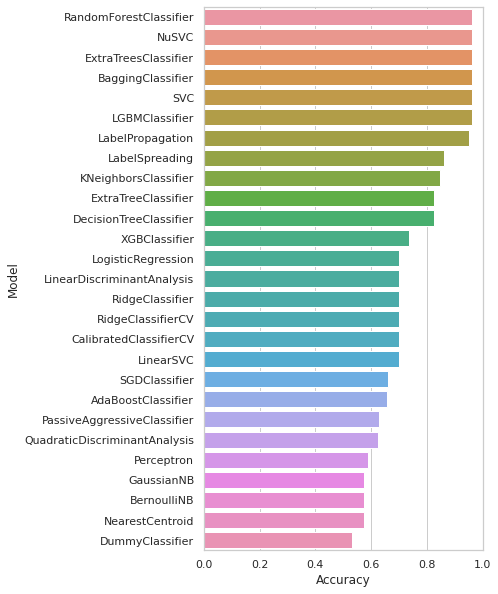

In [25]:
# Bar plot of Accuracy values
import matplotlib.pyplot as plt
import seaborn as sns

#train["Accuracy"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="Accuracy", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

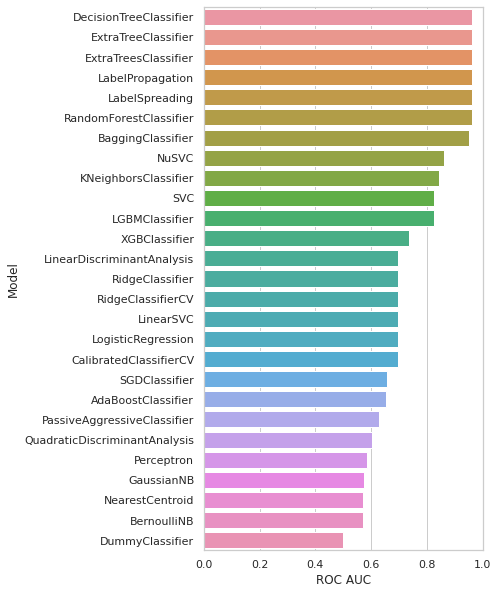

In [16]:
# Bar plot of ROC AUC values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="ROC AUC", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

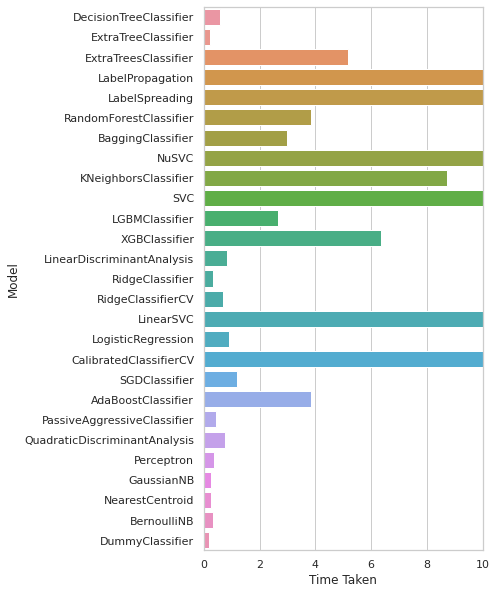

In [21]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))